

#Demo 2 - Operações básicas em DL via Keras (Base Fashion_MNIST)



#### FIAP - Matéria: Deep Learning 2 - Ahirton Lopes

Integrantes:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Ariel Rodrigues             | RM 331163      | `2IA` |
| Duan Nunes             | RM 330648      | `2IA` |
| Jenifer Caroline             | RM 330720      | `2IA` |
| Juliana Fatima            | RM 330985      | `2IA` |

## Importando as libs e fazendo o processamento inicial do dataset

In [0]:
import keras
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from random import randint
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [0]:
# Configurar nossos sets de treinamento e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

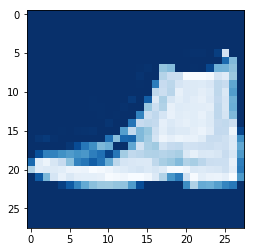

In [0]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='Blues_r'); #Testar com outros itens - só mudar o cmap - cmaps possíveis: #Testar com outros itens - só mudar o cmap - cmaps possíveis: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r e +

## Modelo incial  do professor


In [0]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# Definindo nosso modelo

modelini = Sequential()
modelini.add(Conv2D(32, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
modelini.add(Conv2D(64, (3, 3), activation='relu'))
modelini.add(MaxPooling2D(pool_size=(2, 2)))
modelini.add(Flatten())
modelini.add(Dense(128, activation='relu'))
modelini.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
modelini.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelini.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Definindo nosso treinamento

training = modelini.fit(x_train, 
                     y_train,
                     epochs=1,
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 21s 384us/step - loss: 14.4859 - acc: 0.1012 - val_loss: 14.6272 - val_acc: 0.0925


In [0]:
loss, accuracy = modelini.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 95us/step
Test loss: 14.5
Test accuracy: 10.000%


## Primeiro teste


In [0]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#Definindo o tipo dos dados como um float32 para melhor desempenho
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# Definindo nosso modelo


model = Sequential()
model.add(Conv2D(512, # 32 para 512
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2))) # Mais uma camada
model.add(Flatten())
model.add(Dense(128, activation='sigmoid')) # De relu para sigmoid, 
model.add(Dense(10, activation='sigmoid')) # De softmax para sigmoid





In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 512)       5120      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        294976    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total para

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Na criaçao do modelo de treinamento, como parametro 

In [0]:
# Definindo nosso treinamento

training = model.fit(x_train, 
                     y_train,
                     batch_size=50, # Estava sem batch_size, foi inserido
                     epochs=20, # alterado de 1 para 20
                     verbose=True, 
                     validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 36s 666us/step - loss: 0.5004 - acc: 0.8281 - val_loss: 0.3253 - val_acc: 0.8805
Epoch 2/20
54000/54000 [==============================] - 35s 648us/step - loss: 0.2920 - acc: 0.8946 - val_loss: 0.2713 - val_acc: 0.9027
Epoch 3/20
54000/54000 [==============================] - 35s 647us/step - loss: 0.2434 - acc: 0.9124 - val_loss: 0.2505 - val_acc: 0.9107
Epoch 4/20
54000/54000 [==============================] - 35s 647us/step - loss: 0.2163 - acc: 0.9210 - val_loss: 0.2409 - val_acc: 0.9093
Epoch 5/20
54000/54000 [==============================] - 35s 648us/step - loss: 0.1908 - acc: 0.9304 - val_loss: 0.2246 - val_acc: 0.9143
Epoch 6/20
54000/54000 [==============================] - 35s 645us/step - loss: 0.1740 - acc: 0.9360 - val_loss: 0.2145 - val_acc: 0.9208
Epoch 7/20
54000/54000 [==============================] - 35s 646us/step - loss: 0.1544 - acc: 0.9442 - val_loss: 0.2

In [0]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 3s 251us/step
Test loss: 0.295
Test accuracy: 91.940%


## Segundo teste

In [0]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#Definindo o tipo dos dados como um float32 para melhor desempenho
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# Definindo nosso modelo


model2 = Sequential()
model2.add(Conv2D(512, # 32 para 512
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='sigmoid')) # De relu para sigmoid
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(MaxPooling2D(pool_size=(2, 2))) # Mais uma camada
model2.add(MaxPooling2D(pool_size=(2, 2))) # Mais uma camada
model2.add(Flatten())
model2.add(Dense(128, activation='sigmoid')) # De relu para sigmoid, 
model2.add(Dense(10, activation='sigmoid')) # De softmax para sigmoid




In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 512)       5120      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               73856     
__________

In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Definindo nosso treinamento

training = model2.fit(x_train, 
                     y_train,
                     batch_size=200, # Estava sem batch_size, foi inserido
                     epochs=20, # alterado de 1 para 20
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 29s 535us/step - loss: 0.3028 - acc: 0.8855 - val_loss: 0.3161 - val_acc: 0.8798
Epoch 2/20
54000/54000 [==============================] - 29s 537us/step - loss: 0.3099 - acc: 0.8836 - val_loss: 0.3245 - val_acc: 0.8757
Epoch 3/20
54000/54000 [==============================] - 29s 537us/step - loss: 0.3013 - acc: 0.8869 - val_loss: 0.3018 - val_acc: 0.8870
Epoch 4/20
54000/54000 [==============================] - 29s 537us/step - loss: 0.2880 - acc: 0.8916 - val_loss: 0.3094 - val_acc: 0.8813
Epoch 5/20
54000/54000 [==============================] - 29s 538us/step - loss: 0.2895 - acc: 0.8909 - val_loss: 0.3092 - val_acc: 0.8800
Epoch 6/20
54000/54000 [==============================] - 29s 537us/step - loss: 0.2925 - acc: 0.8902 - val_loss: 0.3094 - val_acc: 0.8840
Epoch 7/20
54000/54000 [==============================] - 29s 540us/step - loss: 0.2887 - acc: 0.8915 - val_loss: 0.3

In [0]:
loss, accuracy = model2.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 2s 248us/step
Test loss: 0.299
Test accuracy: 88.670%


## Resultados


Código passado pelo professor

In [0]:
loss, accuracy = modelini.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 92us/step
Test loss: 3.23
Test accuracy: 10.000%


Primeiro teste feito alterando as camadas do modelo e suas ativações

In [0]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 3s 252us/step
Test loss: 0.295
Test accuracy: 91.940%


Segundo teste feito alterando as camadas do modelo e suas ativações

In [0]:


loss, accuracy = model2.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")


10000/10000 [==============================] - 3s 252us/step
Test loss: 2.52
Test accuracy: 29.340%


***O resultado do primeiro teste se destacou pela acuracia passar de 91,9%***